# Notebook to CQWS calculations

In [2]:
# import sys
# import os
# import numpy as np
# from numpy import linalg as LA
# import scipy.constants
# import matplotlib.pyplot as plt
# import matplotlib as mpl
# from tqdm import tqdm
# import matplotlib.gridspec as gridspec
# from scipy.interpolate import interp1d
import glob as glob
import cqws.solver_qws as solver
# from IPython.display import display, Math
# from tabulate import tabulate
# from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes,mark_inset


# q = 1.602176e-19 #C
# kb = 1.3806504e-23 #J/K
# nii = 0.0
# hbar = 1.054588757e-34
# m_e= 9.1093826E-31 #kg
# m0= 9.1093826E-31 #kg
# pi=np.pi
# eps0= 8.8541878176e-12 #F/m
# J2meV=1e3/q

files = glob.glob('../cqws/binding/*.csv')



# Correct Biniding Energy

In [3]:

bhh = np.genfromtxt(files[1],delimiter=',')
blh = np.genfromtxt(files[0],delimiter=',')

fhh= interp1d(bhh[:,0]/10, bhh[:,1],kind='cubic')
flh= interp1d(blh[:,0]/10, blh[:,1],kind='cubic')
ndat = round(((bhh[-1,0]/10)-(bhh[0,0]/10))/0.002) 
ndatlh = round(((blh[-1,0]/10)-(blh[0,0]/10))/0.002) 

xnew = np.linspace(bhh[0,0]/10,bhh[-1,0]/10,int(ndat))
xnewlh = np.linspace(blh[0,0]/10,blh[-1,0]/10,int(ndatlh))


fig, ax = plt.subplots(1,1,figsize=(10,7))
ax.plot(bhh[:,0]/10,bhh[:,1],'o',mfc='w',ms=10,lw=3,c='b',label='Binding Heavy Holes')
ax.plot(blh[:,0]/10,blh[:,1],'o',mfc='w',ms=10,lw=3,c='r',label='Binding Light Holes')
ax.plot(xnew,fhh(xnew),'-b',lw=3)
ax.plot(xnewlh,flh(xnewlh),'-r',lw=3)
ax.legend(fontsize=15)
ax.set_ylabel(r'$\mathrm{Energy}$',fontsize=20)
ax.set_xlabel(r'$\mathrm{Well\, Width}$',fontsize=20)
ax.tick_params(axis="x", labelsize=18)
ax.tick_params(axis='y', labelsize=18)

plt.show()

NameError: name 'np' is not defined

In [3]:
print('Energy binding hh to well widht 23.74nm : %.1f'%fhh(23.74))
print('Energy binding lh to well widht 23.74nm : %.1f'%flh(23.74))
print('Energy binding hh to well widht 11.87nm : %.1f'%fhh(11.87))
print('Energy binding lh to well widht 11.87nm : %.1f'%flh(11.87))
print('Energy binding hh to well widht 13.85nm : %.1f'%fhh(13.85))
print('Energy binding lh to well widht 13.85nm : %.1f'%flh(13.85))
print('Energy binding hh to well widht 10.0nm : %.1f'%fhh(10.0))
print('Energy binding lh to well widht 10.0nm : %.1f'%flh(10.0))

Energy binding hh to well widht 23.74nm : 6.1
Energy binding lh to well widht 23.74nm : 6.8
Energy binding hh to well widht 11.87nm : 7.3
Energy binding lh to well widht 11.87nm : 7.7
Energy binding hh to well widht 13.85nm : 7.0
Energy binding lh to well widht 13.85nm : 7.5
Energy binding hh to well widht 10.0nm : 7.5
Energy binding lh to well widht 10.0nm : 7.9


Total layer number: 3
Direct Transitions


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

|  ELECTRON [eV]  |  HEAVY HOLE [eV]  |  LIGHT HOLE [eV]  |
|-----------------+-------------------+-------------------|
|   E1-> 1.5391   |   HH1->-0.0051    |   LH1->-0.0134    |
|   E2-> 1.5955   |   HH2->-0.0201    |   LH2->-0.0486    |


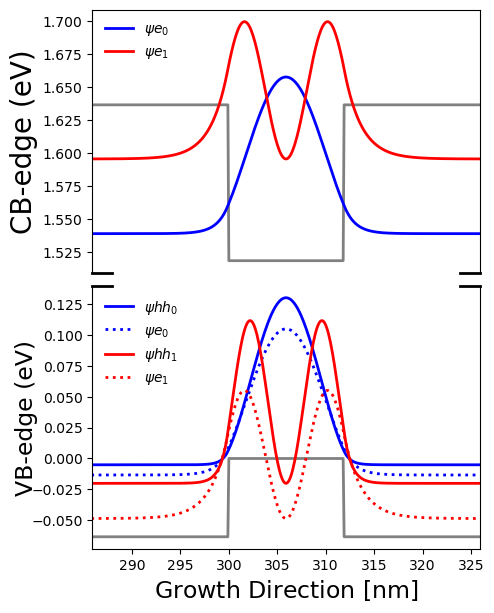

NameError: name 'np' is not defined

In [4]:
%%time

class Structure(object): pass
s3 = Structure() # this will be our datastructure
# TEMPERATURE
s3.structure_name = 'simple'
s3.T = 12#Kelvin
# Binding Energy
s3.HHBinding =6.1e-3 #meV
s3.LHBinding =6.8e-3 #meV
# Band Offset ratios
s3.Qc = 0.65
s3.Qv = 0.35

# Total subband number to be calculated for electrons
s3.subbands = 2
# APPLIED ELECTRIC FIELD
s3.Fapp = 0e4 # (V/m)

# For 1D, z-axis is choosen
s3.gridfactor = 0.1#nm

# REGIONS
# Region input is a two-dimensional list input.
#         | Thickness (nm) | Material | Alloy fraction | Doping(cm^-3) | n or p type |


s3.material =[

             [ 300.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             [ 11.87,'GaAs'  ,      0,   0, 'n','Well'],
            #  [ 1.98, 'AlGaAs',   0.15,   0, 'n','Barrier'],
            #  [11.87,'GaAs'  ,      0,   0, 'n','Well'],
             [ 300.0, 'AlGaAs',   0.15,   0, 'n','Barrier'],
             ]

structure3 = s3
nm = 1e-9
# RUN SIMULATION
model3 = solver.StructureFrom(structure3) #
sol3 = solver.Solver(model3).QuantumSolutions(absolute =True,Print=True)
solver.Solver(model3).plotting(sol3,amp=10,eymin =-0.01,eymax=0.01,hymin=-0.05,hymax=0.12)
TrArr3 = np.vstack((sol3.TEHH,sol3.TELH))
# np.savetxt(newpath+'/Tr-m43521.dat',TrArr3,delimiter=',')
# solver.Solver(model3).save_data(sol3)
plt.show()

In [4]:
from cqws.tools import plotstyle
plotstyle.load_style()


Custom style created and loaded successfully.
Custom style created and loaded successfully.
